In [32]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import io
import scipy.integrate as si
%matplotlib inline
sys.path.append('..')

In [9]:
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [10]:
import umap
import umap.umap_ as umap

# Import Data

In [26]:
#load dataset
#3 patients, pre and post stroke
path = r"C:\Users\jamesjun\Desktop\Simone\BCI_Comp"

P1_pre_training = io.loadmat(path + '\P1_pre_training.mat')
P1_post_training = io.loadmat(path + '\P1_post_training.mat')
P1_pre_test = io.loadmat(path + '\P1_pre_test.mat')
P1_post_test = io.loadmat(path + '\P1_post_test.mat')

P2_pre_training = io.loadmat(path + '\P2_pre_training.mat')
P2_post_training = io.loadmat(path + '\P2_post_training.mat')
P2_pre_test = io.loadmat(path + '\P2_pre_test.mat')
P2_post_test = io.loadmat(path + '\P2_post_test.mat')

P3_pre_training = io.loadmat(path + '\P3_pre_training.mat')
P3_post_training = io.loadmat(path + '\P3_post_training.mat')
P3_pre_test = io.loadmat(path + '\P3_pre_test.mat')
P3_post_test = io.loadmat(path + '\P3_post_test.mat')

In [27]:
P1_pre_training = np.transpose(P1_pre_training["y"])

In [28]:
signals = pd.DataFrame(P1_pre_training)

In [29]:
signals.head()

,0,1,2,3,4,5,6,7,8,9,...,271806,271807,271808,271809,271810,271811,271812,271813,271814,271815
0,38001.839844,54828.550781,-24629.253906,-77839.562500,-48999.753906,49083.140625,58426.789062,4824.330078,-52834.707031,-36870.125000,...,237.237823,240.911209,237.940765,225.686752,228.058884,224.364853,223.616074,211.301407,232.342209,217.404312
1,36892.000000,54868.156250,-24865.400391,-78191.210938,-49155.601562,49022.085938,58299.164062,4553.473145,-53145.550781,-37062.285156,...,67.200867,80.748520,65.053192,70.819519,63.767082,62.016354,60.583214,48.420395,64.845207,53.460869
2,46397.214844,52444.156250,-22964.140625,-76574.710938,-49435.792969,46949.421875,57351.320312,5518.326172,-51877.046875,-37104.460938,...,-20.254774,-6.433470,-22.279264,-17.190567,-25.094515,-29.035860,-24.665348,-40.478428,-24.378088,-31.953056
3,50350.613281,52408.507812,-22914.605469,-76846.210938,-49648.988281,47460.574219,57778.933594,5679.754395,-51894.308594,-37257.718750,...,65.180191,78.548805,60.340450,71.999237,63.971294,62.358620,66.054726,51.014038,67.607742,57.819851
4,37726.980469,54521.210938,-24873.259766,-78150.195312,-49283.152344,48836.085938,58196.039062,4566.033691,-53129.242188,-37165.660156,...,-31.474951,-12.458673,-23.496010,-18.680408,-21.961628,-20.898739,-21.500912,-31.392553,-23.438578,-31.694016


## Spatial Filter (Media Integrale)

In [33]:
def return_ms(signal, dt = 0.0001, granularity = 30):
    
    empty_vec = []
     
    for i in range(0,signal.shape[0], granularity):
        
        if (signal.shape[0] <= i + granularity):
            pivot = signal[i:]
            value = si.simps(pivot, dx = dt)/pivot.shape[0]
            empty_vec.append(value)
            
            return np.array(empty_vec)
        
        pivot = signal[i:i+granularity ]
        value = si.simps(pivot,dx = dt)/granularity 
        empty_vec.append(value)
        
    return np.array(empty_vec)

In [36]:
prova = return_ms(signals.iloc[0,:])

In [42]:
prova = prova[4000:]

In [44]:
prova1 = return_ms(signals.iloc[1,:])
prova1 = prova1[4000:]

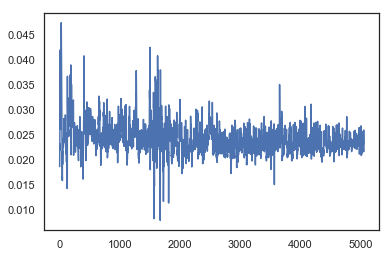

In [43]:
plt.plot(prova)

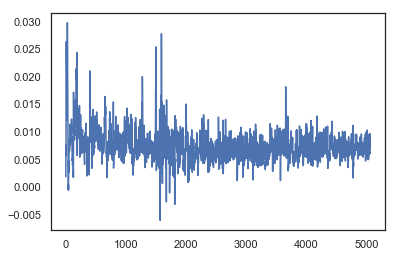

In [45]:
plt.plot(prova1)

# Create the set of features vectors to train UMAP

In [84]:
#1 disease
L=[]
y_train=[]

for i in range(len(Fvector1)): 
    L.append(1)
    y_train.append(0)
    
for i in range(len(Fvector2)):
    L.append(5)
    y_train.append(1)

# UMAP

In [177]:
reducer = umap.UMAP(random_state=42)

In [178]:
np.shape(Fvector)

(116, 2304)

In [179]:
#ridurre la dimensione!!
d=np.shape(Fvector)
Fvector=np.reshape(Fvector,[d[0], d[1]])
np.shape(Fvector)

(116, 2304)

In [180]:
reducer.fit(Fvector)         #arg=la lista dei vettori                         

C:\Users\arian\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='jaccard',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [181]:
embedding = reducer.transform(Fvector)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(116, 2)

Text(0.5, 1.0, 'UMAP projection of the Features Vectors')

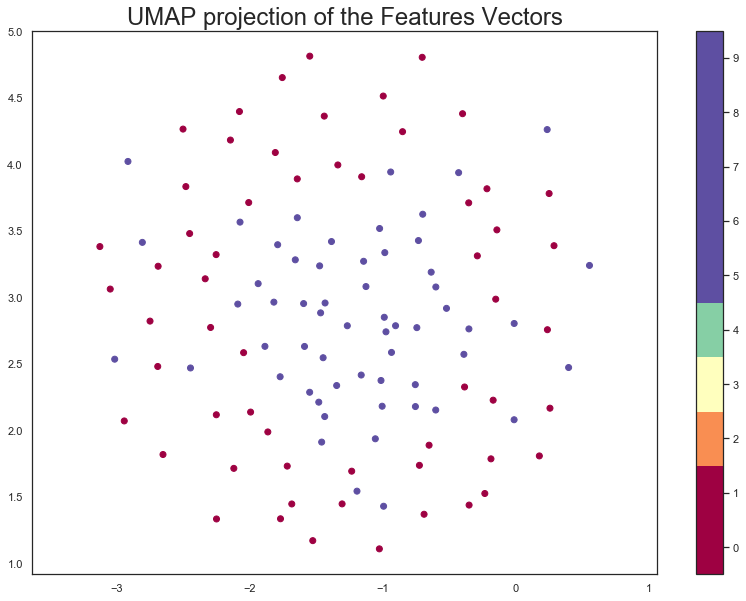

In [200]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=L, cmap='Spectral')  
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Features Vectors', fontsize=24)

In [201]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(Fvector);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=L, cmap='Spectral')
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=L, cmap='Spectral')
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=L, s=100)
    plt.title(title, fontsize=18)

In [184]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

C:\Users\arian\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\arian\anaconda\lib\site-package

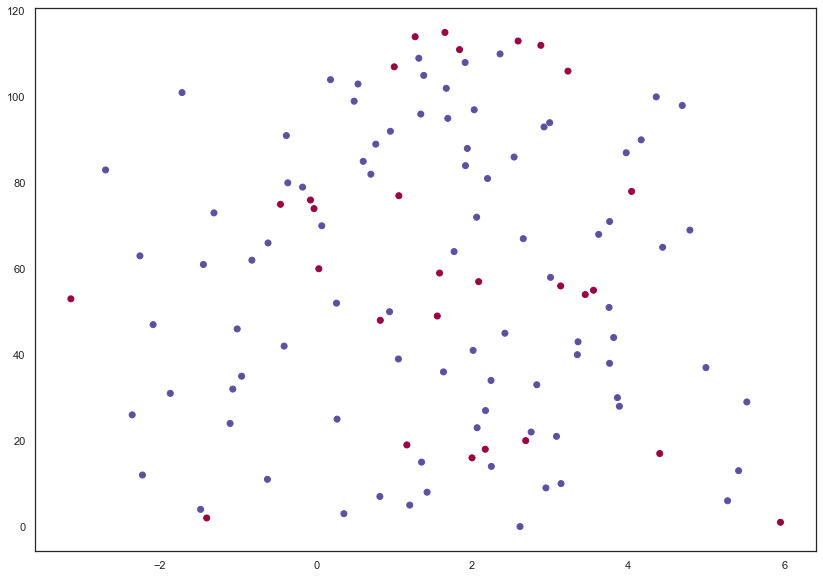

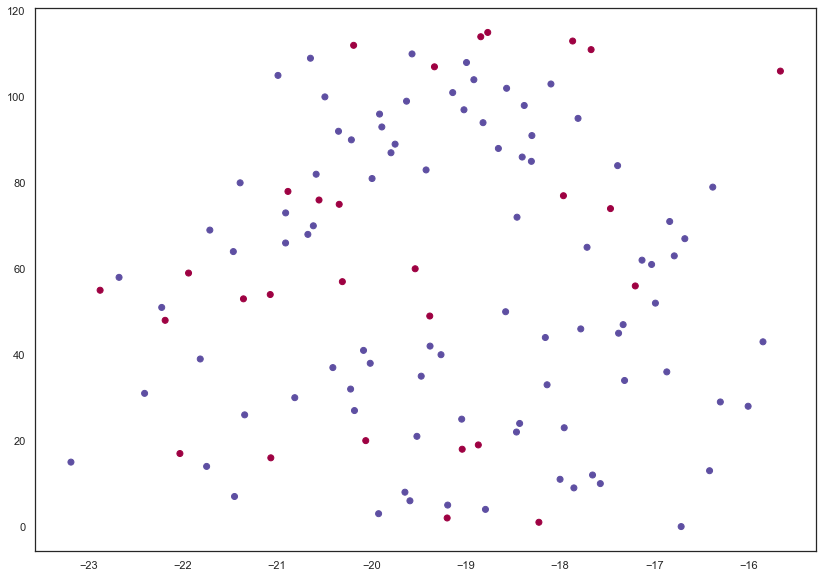

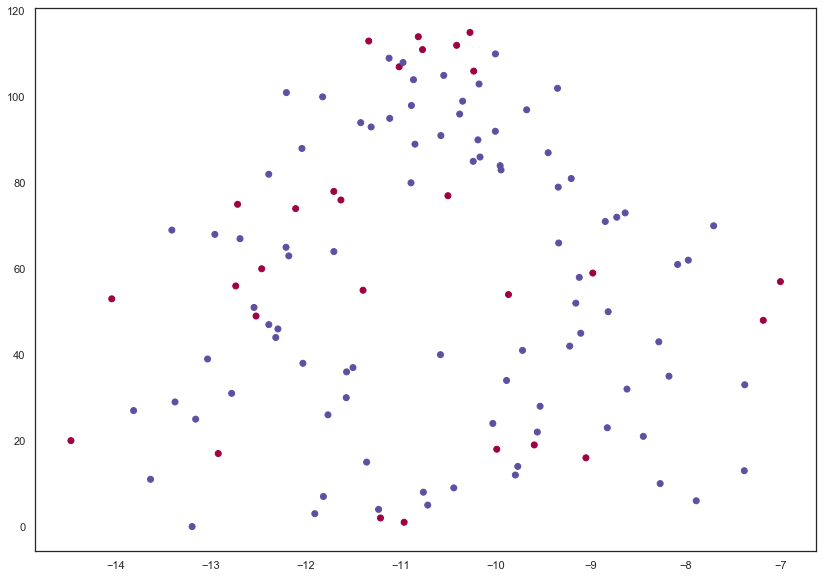

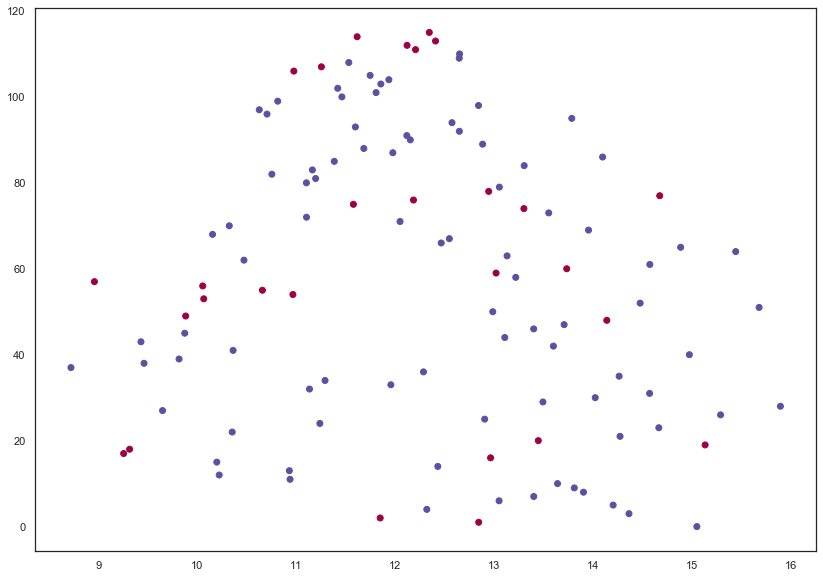

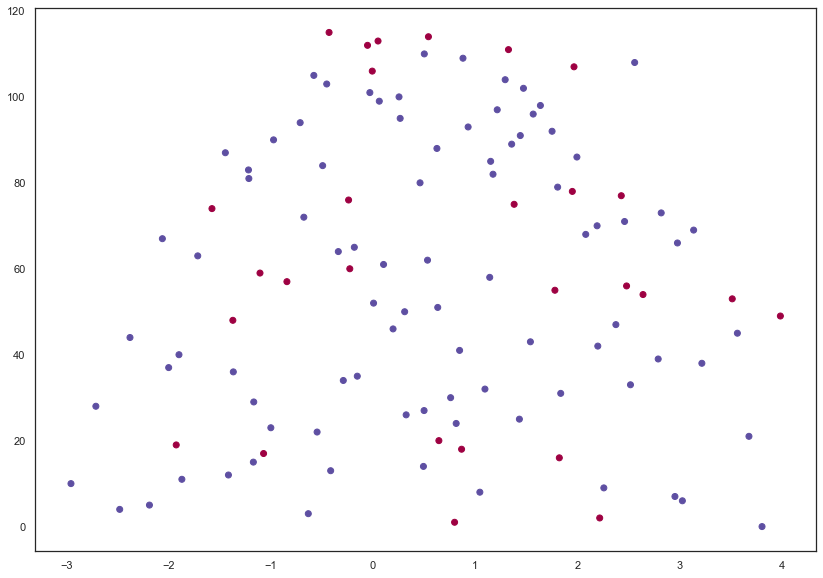

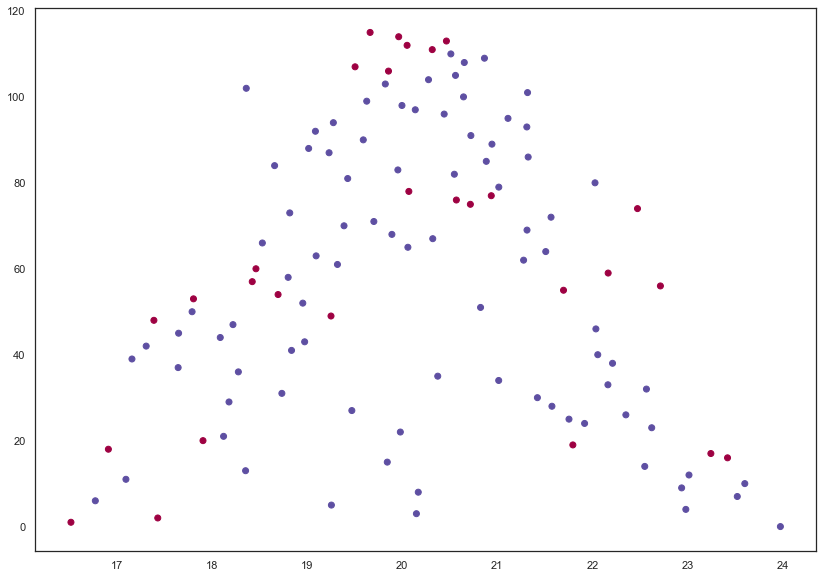

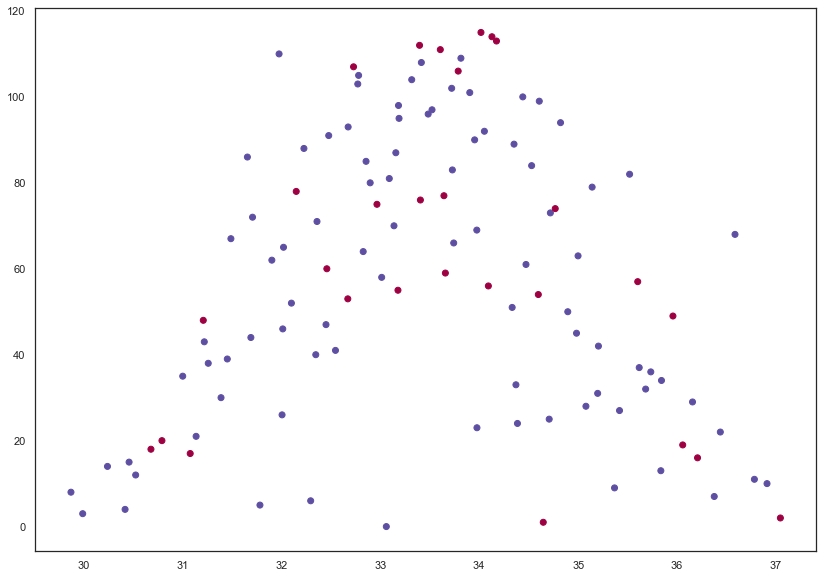

In [202]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_components=1, metric='jaccard', n_neighbors=n)

In [ ]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, metric='jaccard', n_components=1, n_neighbors=2)

In [ ]:
for n in (1, 2, 3):
    draw_umap(n_components=n, metric='jaccard', n_neighbors=50)

In [193]:

from sklearn.cluster import KMeans

In [195]:
kmeans_labels=cluster.KMeans(n_clusters=2).fit(Fvector)